## Packages required


In [1]:
%pip install -r requirements.txt


%pip install pyod
%pip install xgboost
%pip install seaborn
%pip install umap-learn


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Section: Study of the dataset

## Import and cleaning

We import the dataset and clean it by removing all colums that are composed by only zero. Then we save the dataset in a file.

In [2]:
import pandas as pd

# Specify the file path
file_path = 'data/mnist.csv'

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,...,p142,p143,p144,p145,p146,p147,p148,p149,p150,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,197,0,0,1
1,0,0,0,0,245,0,0,0,0,0,...,0,0,0,0,0,0,253,0,0,0
2,0,0,0,0,234,0,45,0,0,10,...,0,0,0,0,0,0,253,253,202,0
3,0,0,0,0,0,0,17,0,0,143,...,0,0,0,0,0,0,0,0,201,0
4,0,0,0,0,254,0,15,0,0,98,...,0,0,0,0,0,0,0,0,93,0


In [3]:
all_zero_columns = df.columns[df.eq(0).all()]
print(all_zero_columns.size)

43


In [4]:
# Drop the columns with all zeros
df = df.drop(all_zero_columns, axis=1)

# Save the cleaned dataset to a new file
cleaned_file_path = 'data/mnist_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)

## Cleaned dataset upload

We import the cleaned dataset, obtained in the previous section.

In [5]:
import pandas as pd

# Specify the file path
cleaned_file_path = 'data/mnist_cleaned.csv'

# Read the cleaned dataset into a pandas DataFrame
df_cleaned = pd.read_csv(cleaned_file_path)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

# check for columns with the same value
same_value_columns = df_cleaned.columns[df_cleaned.nunique() == 1]
print(same_value_columns.size)

# split in to features and labels
df_cleaned_features = df_cleaned.iloc[:, :-1]
df_cleaned_labels = df_cleaned.iloc[:, -1]

0


## Further cleaning

In the following we have explored how many columns have more than 5450 zeros, maybe it could a good idea drop these columns and for that reason there is the `df_double_cleaned_features`.

In [6]:
df_cleaned_features.stack().value_counts(normalize=True)

0      0.688218
253    0.065332
252    0.024836
254    0.019184
255    0.011502
         ...   
153    0.000416
69     0.000365
87     0.000364
124    0.000360
90     0.000353
Name: proportion, Length: 256, dtype: float64

In [7]:
frequences = df_cleaned_features.apply(pd.Series.value_counts)

columns_greater_5450 = frequences.columns[(frequences.iloc[0] > 5450)]
num_columns_greater_5450 = len(columns_greater_5450)
print(f"There are {num_columns_greater_5450} columns with a number greater than 5450 at position 0:")
print(columns_greater_5450)

# Drop the columns with a number greater than 5450 at position 0
df_double_cleaned_features = df_cleaned_features.drop(columns_greater_5450, axis=1)

There are 30 columns with a number greater than 5450 at position 0:
Index(['p01', 'p16', 'p17', 'p20', 'p23', 'p29', 'p31', 'p41', 'p42', 'p43',
       'p54', 'p63', 'p75', 'p77', 'p78', 'p80', 'p91', 'p95', 'p96', 'p100',
       'p101', 'p103', 'p105', 'p110', 'p119', 'p127', 'p128', 'p130', 'p138',
       'p146'],
      dtype='object')


## Data visualization

### PCA
We perform both a PCA in 2d and 3d and then scatter plot the projection of the dataset.

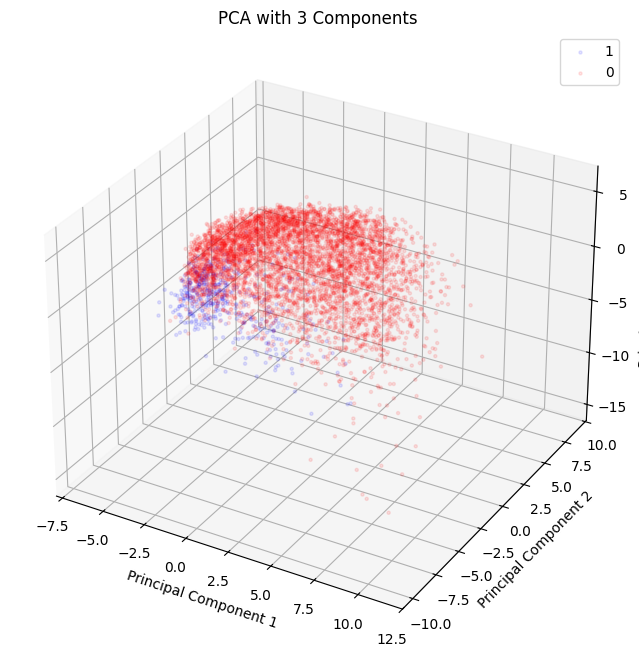

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_cleaned_features_scaled = scaler.fit_transform(df_cleaned_features)

# Perform PCA to reduce the dimensionality to 3 dimensions
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_cleaned_features_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

# Concatenate with the labels
df_pca = pd.concat([df_pca, df_cleaned_labels], axis=1)

# Plot PCA results with different colors for different classes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
for label, color in zip(df_pca['class'].unique(), ['blue', 'red']):
    ax.scatter(df_pca.loc[df_pca['class'] == label, 'PC1'],
               df_pca.loc[df_pca['class'] == label, 'PC2'],
               df_pca.loc[df_pca['class'] == label, 'PC3'],
               c=color, label=label, alpha=0.1, marker='.')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA with 3 Components')
ax.legend()

plt.show()

The following is the PCA in 2d.

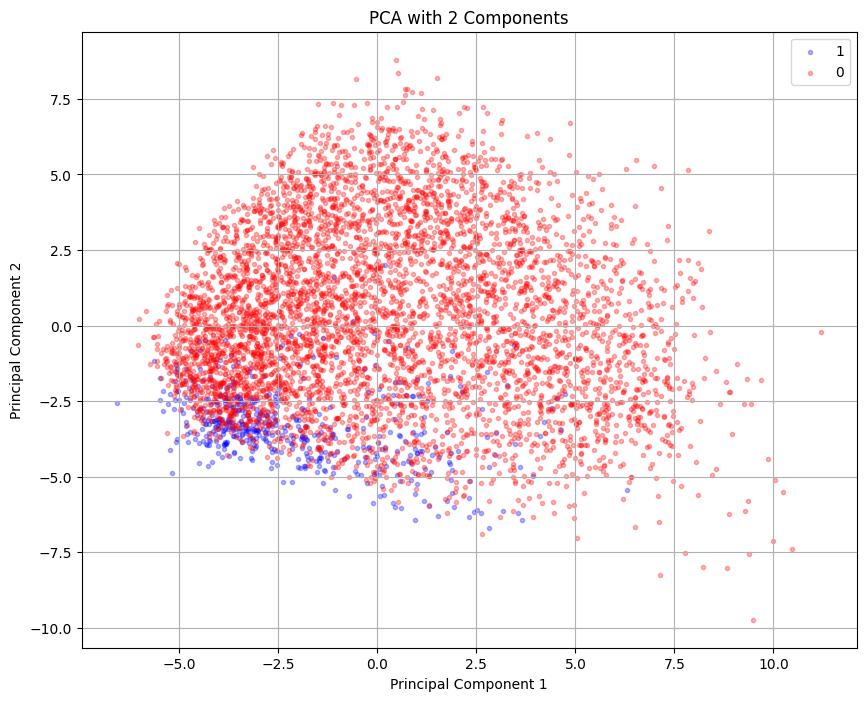

In [9]:
# Standardize the features (important for PCA)
scaler = StandardScaler()
df_cleaned_features_scaled = scaler.fit_transform(df_cleaned_features)

# Perform PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_cleaned_features_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate with the labels
df_pca = pd.concat([df_pca, df_cleaned_labels], axis=1)

# Plot PCA results with different colors for different classes
plt.figure(figsize=(10, 8))

# Scatter plot
for label, color in zip(df_pca['class'].unique(), ['blue', 'red']):
    plt.scatter(df_pca.loc[df_pca['class'] == label, 'PC1'],
                df_pca.loc[df_pca['class'] == label, 'PC2'],
                c=color, label=label, alpha=0.3, marker='.')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with 2 Components')
plt.legend()
plt.grid(True)
plt.show()


As we can see the data are not well separated in the map produced by the PCAs. This will reflect in bad performance in standard outlier detection algortihms, for example iForest, as we will see later.

### tSNE

tSNE is an unsupervised dimensionality reduction algorithm that, unlike PCA, tries to maintain local structure of the points. For this reason the tSNE map should be looked only locally.

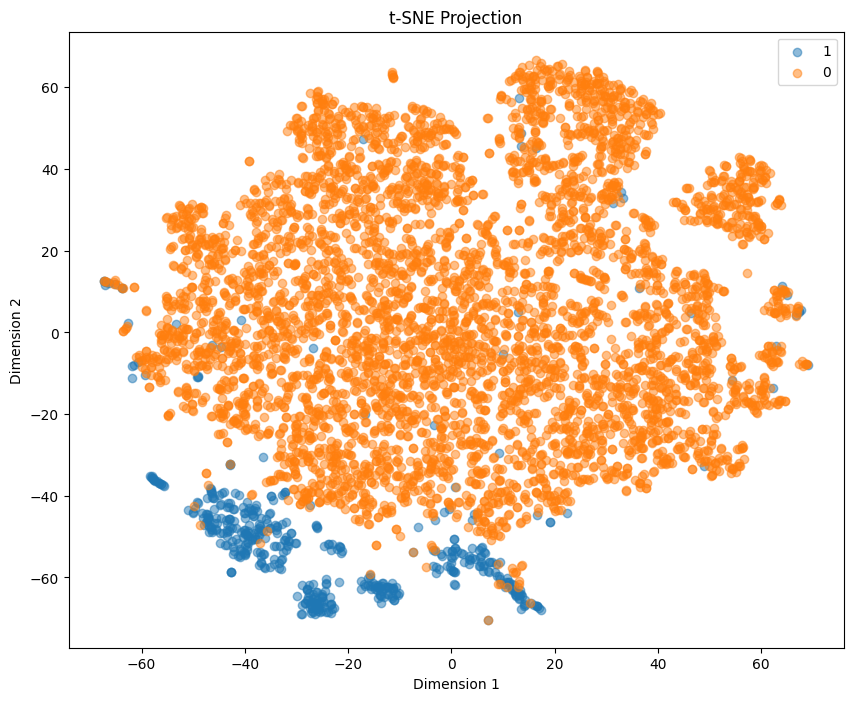

In [10]:
from sklearn.manifold import TSNE

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_cleaned_features)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_components = tsne.fit_transform(features_scaled)
tsne_df = pd.DataFrame(data = tsne_components, columns=['Dim1', 'Dim2'])
tsne_df = pd.concat([tsne_df, df_cleaned_labels], axis=1)

# Plot
plt.figure(figsize=(10, 8))
for label in tsne_df['class'].unique():
    subset = tsne_df[tsne_df['class'] == label]
    plt.scatter(subset['Dim1'], subset['Dim2'], label=label, alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Projection')
plt.legend()
plt.show()

### Correlation matrix

We now calculate the feature by feature correlation matrix and represent it as a heat map.

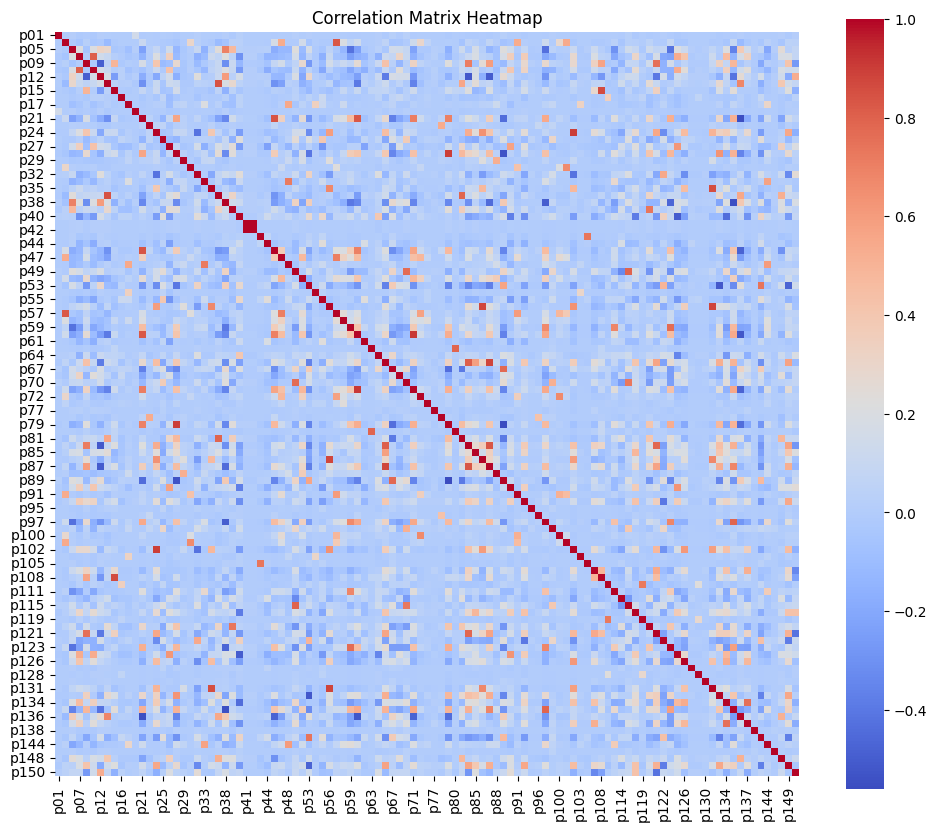

In [12]:
# Calculate the correlation matrix
corr_matrix = df_cleaned_features.corr()

# Plot as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Except in very few features, the correlation matrix does not reveal much information.

# Section: Algorithms implementation


### Choice of the Algorithms

We conducted the analysis on our dataset using various anomaly detection algorithms. These algorithms included ABOD, IForest, KNN, OCSVM. Additionally, we utilized the presence of labels in our dataset to experiment with classification algorithms as outlier detection algorithms, such as Random forest, XGBoost and SVM.

### Explanation of Algorithms

#### Anomaly Detection Algorithms

**K-Nearest Neighbors (KNN):**

Detects anomalies by measuring the distance between data points. Points that are far from their nearest neighbors are considered anomalies. 

*Computational Cost:* The time complexity for KNN in anomaly detection is $O(n^2)$ for training and prediction, where $n$ is the number of samples. This is due to the need to compute the distance between each pair of points.

**Isolation Forest (IForest):**

Constructs a forest of random trees and isolates anomalies by creating partitions. Anomalies require fewer partitions to be isolated compared to normal data points.

*Computational Cost:* The time complexity for Isolation Forest is $O(t \cdot n \cdot \log n)$, where $t$ is the number of trees and $n$ is the number of samples. This is because each tree is built in $O(n \log n)$ time.

**Angle-Based Outlier Detection (ABOD):**

Identifies anomalies by considering the variance of the angles between a point and all other pairs of points. Points with low variance in angles are considered anomalies.

*Computational Cost:* The time complexity for ABOD is $O(n^3)$, where $n$ is the number of samples. This high complexity arises because it needs to compute angles between all pairs of points for each point.

**FastABOD:**

A faster approximation of the ABOD algorithm that reduces the computational burden by considering only a subset of neighboring points when computing the variance of angles.

*Computational Cost:* The time complexity for FastABOD is $O(n^2)$, where $n$ is the number of samples. This reduction in complexity is achieved by limiting the angle variance computation to a smaller neighborhood.

**One-Class SVM (OCSVM):**

A variant of Support Vector Machines that learns a decision function for anomaly detection. It separates the normal data points from the origin in a high-dimensional space.

*Computational Cost:* The time complexity for OCSVM is between $O(n^2)$ and $O(n^3)$ depending on the implementation and the kernel used, where $n$ is the number of samples. This complexity is due to the quadratic programming problem solved during training.

#### Supervised Classification Algorithms

**Random Forest:**

An ensemble learning method that constructs multiple decision trees during training. It outputs the mode of the classes for classification tasks. It is robust and reduces overfitting by averaging multiple trees.

*Computational Cost:* The time complexity for training a Random Forest is $O(t \cdot m \cdot n \cdot \log n)$, where $t$ is the number of trees, $m$ is the number of features, and $n$ is the number of samples. Prediction complexity is $O(t \cdot \log n)$ since each tree makes a prediction in $O(\log n)$ time.

**XGBoost:**

An efficient and scalable implementation of gradient boosting framework. It builds models sequentially, with each model trying to correct the errors of the previous ones.

*Computational Cost:* The time complexity for training XGBoost is $O(t \cdot m \cdot n \cdot \log n)$, where $t$ is the number of boosting rounds, $m$ is the number of features, and $n$ is the number of samples. Prediction complexity is $O(t \cdot \log n)$.

**Support Vector Machine (SVM):**

A classification method that finds the hyperplane which best separates the data into classes. It uses kernel functions to handle non-linear relationships.

*Computational Cost:* The time complexity for training SVM is between $O(n^2)$ and $O(n^3)$ depending on the kernel used, where $n$ is the number of samples. Prediction complexity is $O(n)$ for linear kernel and $O(n^2)$ for non-linear kernels.


### Metrics Used in Grid Search and Evaluation

In this notebook, we utilize several important metrics to perform grid search and evaluate the performance of our models. Below are the explanations and computational details for each of these metrics.

#### Precision-Recall Curve

**Precision:**

Precision is the ratio of true positive predictions to the total number of positive predictions (both true and false positives).

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$

*Computational Cost:* $O(n)$, where $n$ is the number of samples.

**Recall:**

Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total number of actual positive instances.

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$

*Computational Cost:* $O(n)$, where $n$ is the number of samples.

**Precision-Recall Curve:**

A plot of precision versus recall for different threshold values. It helps to understand the trade-off between precision and recall for different thresholds.

*Computational Cost:* $O(n \log n)$, where $n$ is the number of samples, due to the sorting step.

#### Area Under the Curve (AUC)

**Precision-Recall AUC (PR AUC):**

The area under the precision-recall curve. A higher PR AUC indicates a better model performance.

*Computational Cost:* $O(n)$, where $n$ is the number of samples.

**Receiver Operating Characteristic (ROC) Curve:**

A plot of the true positive rate (recall) against the false positive rate for different threshold values.

*Computational Cost:* $O(n \log n)$, where $n$ is the number of samples, due to the sorting step.

**ROC AUC:**

The area under the ROC curve. A higher ROC AUC indicates a better model performance.

*Computational Cost:* $O(n)$, where $n$ is the number of samples.

#### Average Precision Score

Average precision score summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight.

$$ \text{Average Precision} = \sum_{n} (R_n - R_{n-1}) P_n $$

where $P_n$ and $R_n$ are the precision and recall at the $n$-th threshold.

*Computational Cost:* $O(n)$, where $n$ is the number of samples.

#### Evaluation Metrics in Custom Grid Search

In the custom grid search function, we primarily use the average precision score to determine the best set of parameters for each model.
By using this metric, we ensure that our models are evaluated comprehensively, focusing on their ability to distinguish between normal and anomalous instances accurately.

Params: {'n_neighbors': 5, 'contamination': 0.09090909090909091}, Average Precision: 0.21972143396121385
Params: {'n_neighbors': 20, 'contamination': 0.09090909090909091}, Average Precision: 0.25002592956322445
Params: {'n_neighbors': 50, 'contamination': 0.09090909090909091}, Average Precision: 0.2752283911249186
Best Params for KNN: {'n_neighbors': 50, 'contamination': 0.09090909090909091}, Best Average Precision: 0.2752283911249186
Params: {'n_estimators': 50, 'contamination': 0.09090909090909091}, Average Precision: 0.18674277860276933
Params: {'n_estimators': 100, 'contamination': 0.09090909090909091}, Average Precision: 0.12254064052626443
Params: {'n_estimators': 200, 'contamination': 0.09090909090909091}, Average Precision: 0.14536879921462648
Best Params for IForest: {'n_estimators': 50, 'contamination': 0.09090909090909091}, Best Average Precision: 0.18674277860276933
Params: {'n_neighbors': 5, 'contamination': 0.09090909090909091}, Average Precision: 0.17054961601898613
Para

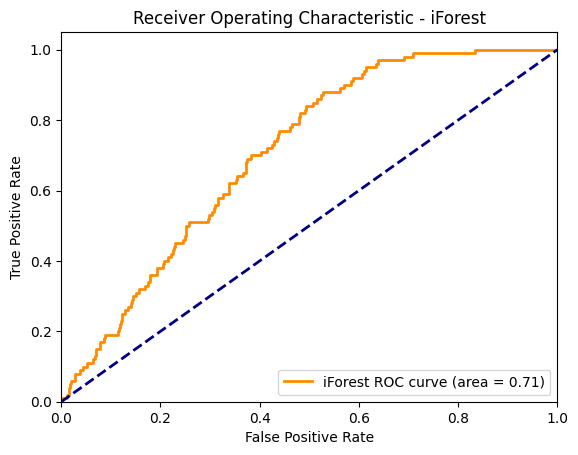

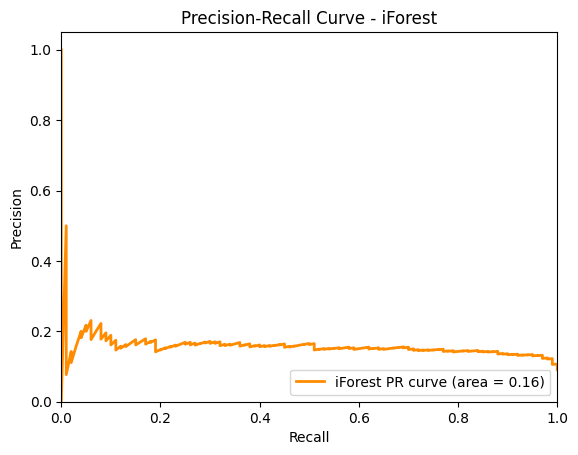

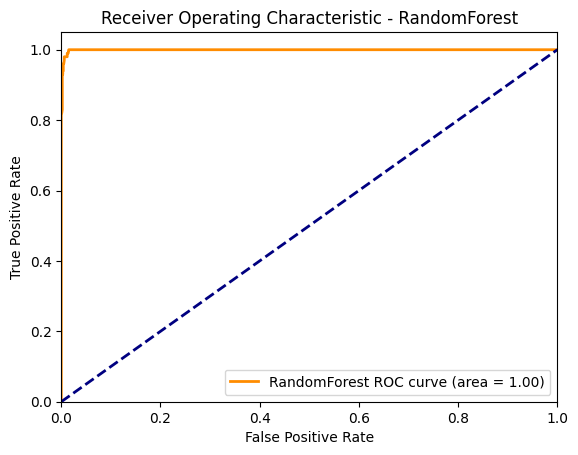

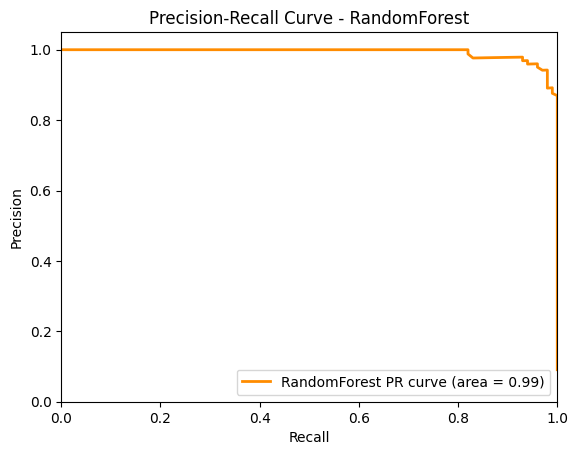

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

CONTAMINATION = 1/11  # percentage of outliers

# Assume df_cleaned_features and df_cleaned_labels are defined
X = df_cleaned_features
y = df_cleaned_labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom Grid Search Function for all models
def custom_grid_search_cv(model_class, param_grid, X_train, y_train):
    best_score = -np.inf
    best_params = None
    best_model = None
    
    for params in param_grid:
        try:
            model = model_class(**params)
            model.fit(X_train)
            y_train_scores = model.decision_scores_ if hasattr(model, 'decision_scores_') else model.predict_proba(X_train)[:, 1]
            mean_score = average_precision_score(y_train, y_train_scores)
            print(f"Params: {params}, Average Precision: {mean_score}")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Error with params {params}: {e}")
    print(f"Best Params for {model_class.__name__}: {best_params}, Best Average Precision: {best_score}")
    return best_model

# Define parameter grids for anomaly detection models
knn_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20, 50] for c in [CONTAMINATION]]
iforest_param_grid = [{'n_estimators': n, 'contamination': c} for n in [50, 100, 200] for c in [CONTAMINATION]]
fastabod_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20] for c in [CONTAMINATION]]
ocsvm_param_grid = [{'nu': n, 'kernel': k, 'gamma': g, 'contamination': c} for n in [0.1, 0.3] for k in ['linear', 'rbf'] for g in ['scale'] for c in [CONTAMINATION]]

# Perform grid search for each anomaly detection model
best_knn = custom_grid_search_cv(KNN, knn_param_grid, X_train, y_train)
best_iforest = custom_grid_search_cv(IForest, iforest_param_grid, X_train, y_train)
best_fastabod = custom_grid_search_cv(ABOD, fastabod_param_grid, X_train, y_train)
best_ocsvm = custom_grid_search_cv(OCSVM, ocsvm_param_grid, X_train, y_train)

# Save anomaly detection models in a dictionary
best_models = {'KNN': best_knn, 'IForest': best_iforest, 'FastABOD': best_fastabod, 'OCSVM': best_ocsvm}

# RandomForest Classifier (Supervised)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring='average_precision', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}, Best Average Precision: {grid_search_rf.best_score_}")

best_models['RandomForest'] = best_rf

# XGBoost Classifier (Supervised)
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
}

xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, scoring='average_precision', cv=5)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_
print(f"Best Params for XGBoost: {grid_search_xgb.best_params_}, Best Average Precision: {grid_search_xgb.best_score_}")

best_models['XGBoost'] = best_xgb

# SVM Classifier (Supervised)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
}

svm_clf = SVC(probability=True, random_state=42)
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=svm_param_grid, scoring='average_precision', cv=5)
grid_search_svm.fit(X_train, y_train)

best_svm = grid_search_svm.best_estimator_
print(f"Best Params for SVM: {grid_search_svm.best_params_}, Best Average Precision: {grid_search_svm.best_score_}")

best_models['SVM'] = best_svm

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        if model_name in ['RandomForest', 'XGBoost', 'SVM']:
            y_train_pred = model.predict(X_train)
            y_train_scores = model.predict_proba(X_train)[:, 1]
            y_test_pred = model.predict(X_test)
            y_test_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_train_pred = model.labels_
            y_train_scores = model.decision_scores_
            y_test_pred = model.predict(X_test)
            y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')
y_test_scores_rf, _ = evaluate_model(best_rf, X_train, y_train, X_test, y_test, 'RandomForest')
y_test_scores_xgb, _ = evaluate_model(best_xgb, X_train, y_train, X_test, y_test, 'XGBoost')
y_test_scores_svm, _ = evaluate_model(best_svm, X_train, y_train, X_test, y_test, 'SVM')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

# plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
# plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
# plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')
plot_roc_pr_curves(y_test, y_test_scores_rf, 'RandomForest')
# plot_roc_pr_curves(y_test, y_test_scores_xgb, 'XGBoost')
# plot_roc_pr_curves(y_test, y_test_scores_svm, 'SVM')

We have only shown graphs of the iForest and RandomForest algorithms because they are representative of the unsupervised and supervised algorithms respectively. 
As we have seen in the PCA visualisation, the problem isn't suitable for an ordinary outlier detection algorithm because of the weak outlierliness of the points obtained by a digit six.
For this reason, it was a natural consequence to consider a classification algorithm that can use the labels to understand which points are outliers and which are not.

For the sake of completeness, in the next section we will try another approach to unsupervised anomaly detection.

## Experiments with balanced data 
In this section I try to train the model on a dataset consisting of 50% inliers and 50% outliers. Again, the standard anomaly detection algorithm performs quite poorly, while the supervised one gets the best out of the data.

Params: {'n_neighbors': 5, 'contamination': 0.5}, AUC-ROC: 0.34676874999999996
Params: {'n_neighbors': 20, 'contamination': 0.5}, AUC-ROC: 0.33976875
Params: {'n_neighbors': 50, 'contamination': 0.5}, AUC-ROC: 0.3279875
Best Params: {'n_neighbors': 5, 'contamination': 0.5}, Best AUC-ROC: 0.34676874999999996
Params: {'n_estimators': 50, 'contamination': 0.5}, AUC-ROC: 0.26860625000000005
Params: {'n_estimators': 100, 'contamination': 0.5}, AUC-ROC: 0.287825
Params: {'n_estimators': 200, 'contamination': 0.5}, AUC-ROC: 0.25564375
Best Params: {'n_estimators': 100, 'contamination': 0.5}, Best AUC-ROC: 0.287825
Params: {'n_neighbors': 5, 'contamination': 0.5}, AUC-ROC: 0.37515
Params: {'n_neighbors': 20, 'contamination': 0.5}, AUC-ROC: 0.351025
Best Params: {'n_neighbors': 5, 'contamination': 0.5}, Best AUC-ROC: 0.37515
Params: {'nu': 0.1, 'kernel': 'linear', 'gamma': 'scale', 'contamination': 0.5}, AUC-ROC: 0.5188875
Params: {'nu': 0.1, 'kernel': 'rbf', 'gamma': 'scale', 'contamination': 

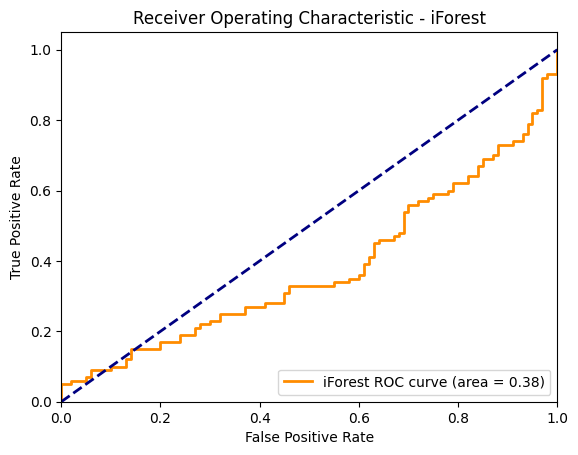

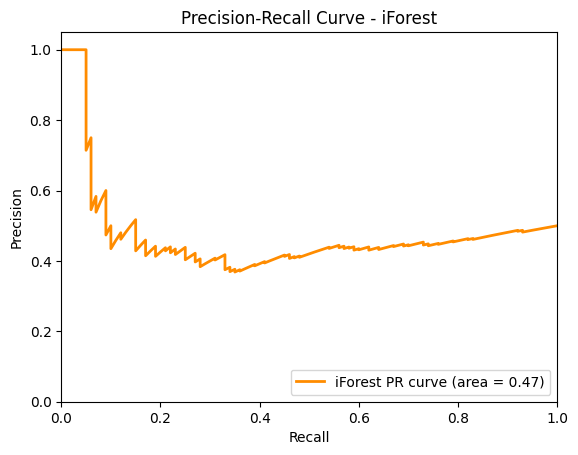

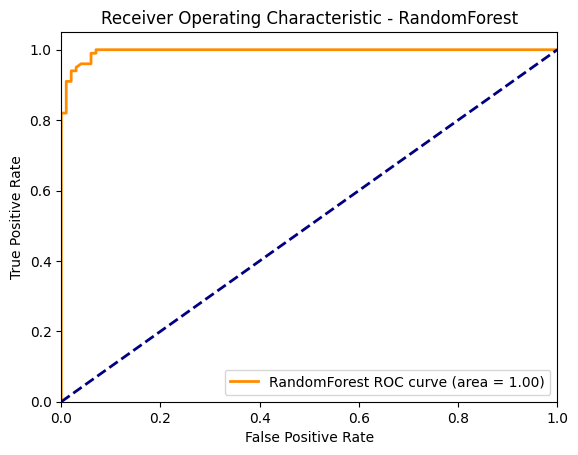

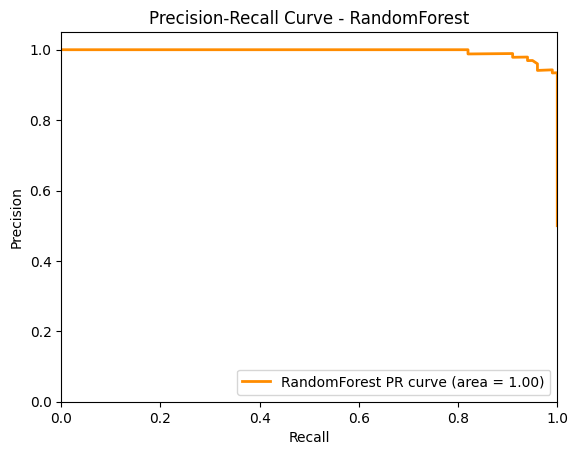

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.abod import ABOD
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import evaluate_print
import matplotlib.pyplot as plt

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom Grid Search Function
def custom_grid_search_cv(model_class, param_grid, X_train, y_train):
    best_score = -np.inf
    best_params = None
    best_model = None
    
    for params in param_grid:
        try:
            model = model_class(**params)
            model.fit(X_train)
            y_train_scores = model.decision_scores_
            mean_score = roc_auc_score(y_train, y_train_scores)
            #scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
            #mean_score = scores.mean()
            print(f"Params: {params}, AUC-ROC: {mean_score}")
            if mean_score > best_score:
                best_score = mean_score
                best_params = params
                best_model = model
        except Exception as e:
            print(f"Error with params {params}: {e}")
    print(f"Best Params: {best_params}, Best AUC-ROC: {best_score}")
    return best_model

# Define parameter grids
knn_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20, 50] for c in [0.5]]
iforest_param_grid = [{'n_estimators': n, 'contamination': c} for n in [50, 100, 200] for c in [0.5]]
fastabod_param_grid = [{'n_neighbors': k, 'contamination': c} for k in [5, 20] for c in [0.5]]
ocsvm_param_grid = [{'nu': n, 'kernel': k, 'gamma': g, 'contamination': c} for n in [0.1, 0.3] for k in ['linear', 'rbf'] for g in ['scale'] for c in [0.5]]

# Perform grid search for each model
best_knn = custom_grid_search_cv(KNN, knn_param_grid, X_train, y_train)
best_iforest = custom_grid_search_cv(IForest, iforest_param_grid, X_train, y_train)
best_fastabod = custom_grid_search_cv(ABOD, fastabod_param_grid, X_train, y_train)
best_ocsvm= custom_grid_search_cv(OCSVM, ocsvm_param_grid, X_train, y_train)

# Save models in a dictionary
best_models = {'KNN': best_knn, 'IForest': best_iforest, 'FastABOD': best_fastabod, 'OCSVM': best_ocsvm}

# RandomForest Classifier (Supervised)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2'],
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, scoring='roc_auc', cv=5)
grid_search_rf.fit(X_train, y_train)

best_rf = grid_search_rf.best_estimator_
print(f"Best Params for RandomForest: {grid_search_rf.best_params_}, Best AUC-ROC: {grid_search_rf.best_score_}")

best_models['RandomForest'] = best_rf

# Evaluation function
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    if model:
        if model_name == 'RandomForest':
            y_train_pred = model.predict(X_train)
            y_train_scores = model.predict_proba(X_train)[:, 1]
            y_test_pred = model.predict(X_test)
            y_test_scores = model.predict_proba(X_test)[:, 1]
        else:
            y_train_pred = model.labels_
            y_train_scores = model.decision_scores_
            y_test_pred = model.predict(X_test)
            y_test_scores = model.decision_function(X_test)

        print(f"\nOn Training Data ({model_name}):")
        evaluate_print(model_name, y_train, y_train_scores)
        print(f"\nOn Test Data ({model_name}):")
        evaluate_print(model_name, y_test, y_test_scores)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)
        print(f"PR AUC ({model_name}): ", pr_auc)
        return y_test_scores, model_name
    else:
        print(f"Model {model_name} could not be evaluated.")
        return None, model_name

# Train and evaluate models
y_test_scores_knn, _ = evaluate_model(best_knn, X_train, y_train, X_test, y_test, 'KNN')
y_test_scores_if, _ = evaluate_model(best_iforest, X_train, y_train, X_test, y_test, 'IForest')
y_test_scores_fabod, _ = evaluate_model(best_fastabod, X_train, y_train, X_test, y_test, 'FastABOD')
y_test_scores_ocsvm, _ = evaluate_model(best_ocsvm, X_train, y_train, X_test, y_test, 'OCSVM')
y_test_scores_rf, _ = evaluate_model(best_rf, X_train, y_train, X_test, y_test, 'RandomForest')

# Plot ROC and PR curves
def plot_roc_pr_curves(y_test, y_test_scores, model_name):
    if y_test_scores is not None:
        fpr, tpr, _ = roc_curve(y_test, y_test_scores)
        roc_auc = auc(fpr, tpr)
        precision, recall, _ = precision_recall_curve(y_test, y_test_scores)
        pr_auc = auc(recall, precision)

        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

        plt.figure()
        plt.plot(recall, precision, color='darkorange', lw=2, label=f'{model_name} PR curve (area = %0.2f)' % pr_auc)
        plt.xlim([0, 1])
        plt.ylim([0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()

# plot_roc_pr_curves(y_test, y_test_scores_knn, 'kNN')
plot_roc_pr_curves(y_test, y_test_scores_if, 'iForest')
# plot_roc_pr_curves(y_test, y_test_scores_fabod, 'FastABOD')
# plot_roc_pr_curves(y_test, y_test_scores_ocsvm, 'OCSVM')
plot_roc_pr_curves(y_test, y_test_scores_rf, 'RandomForest')


The following code experiments with the use of tSNE, a dimensionality reduction algorithm, to improve the performance of a clustering algorithm, here KMeans.

We have three plots. The first ones are the true labels. The second ones are the labels obtained by the KMeans algorithm performed on the data given in output by the tSNE (2 features). The third ones are the labels obtained by the KMeans algorithm on the dataset (107 features) before the tSNE transformation. 

These plots show how a technique such as tSNE improves performance in the unsupervised setting. In fact, we can clearly see how KMeans produces much better results when performed on the data obtained after tSNE. Conversely, the projection of the labels obtained by KMeans in the high dimensional space is not as good.
This is because the tSNE can reveal some of the manifold structure of the data that cannot be seen using the KMeans algorithm alone. For this manifold structure-like explanation, there is a clear image in the repository called swiss_roll.png, and the intuition of tSNE is that the dataset is unrolled and flattened, preserving the structure of a 2D manifold.

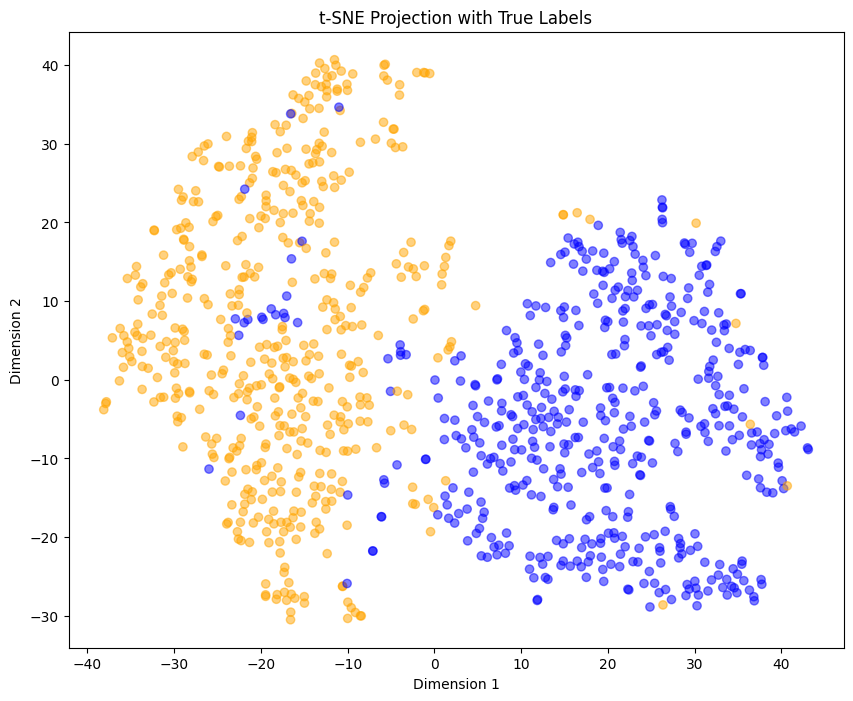

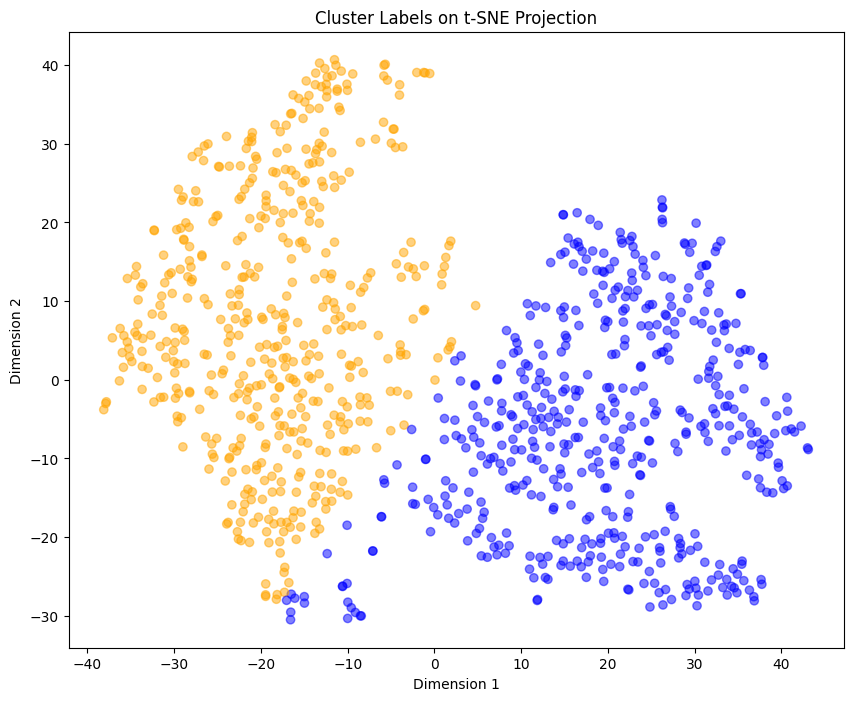

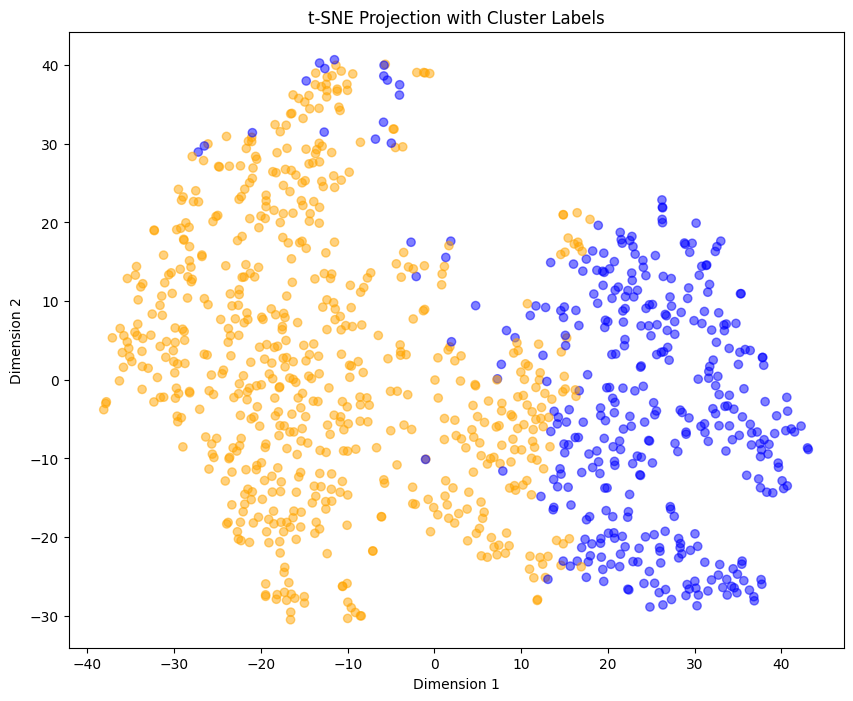

In [15]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm

# Equalize the number of inliers and outliers
inliers = df_cleaned[df_cleaned['class'] == 0].sample(n=500, random_state=42)
outliers = df_cleaned[df_cleaned['class'] == 1].sample(n=500, random_state=42)

# Concatenate and shuffle the dataset
df_eq = pd.concat([inliers, outliers]).sample(frac=1, random_state=42)
X = df_eq.iloc[:, :-1]
y = df_eq.iloc[:, -1]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_components = tsne.fit_transform(features_scaled)
tsne_df = pd.DataFrame(data=tsne_components, columns=['Dim1', 'Dim2'])

# Standardize tSNE features
tsne_scaled = scaler.fit_transform(tsne_df)

# Perform K-means clustering on original scaled features
kmeans_original = KMeans(n_clusters=2, random_state=0)
kmeans_original.fit(features_scaled)
cluster_labels_original = kmeans_original.labels_

# Perform K-means clustering on t-SNE scaled features
kmeans_tsne = KMeans(n_clusters=2, random_state=0)
kmeans_tsne.fit(tsne_scaled)
cluster_labels_tsne = kmeans_tsne.labels_

# Add true labels to t-SNE dataframe
y.index = tsne_df.index
tsne_df['True_Label'] = y  

tsne_df['Cluster_Label_original'] = cluster_labels_original
tsne_df['Cluster_Label'] = cluster_labels_tsne

# Define colors for true labels and cluster labels
color_map = {0: 'orange', 1: 'blue'}
color_map_reverse = {0: 'blue', 1: 'orange'}

# Map colors to true labels and cluster labels
tsne_df['True_Label_Color'] = tsne_df['True_Label'].map(color_map_reverse)
tsne_df['Cluster_Label_Color'] = tsne_df['Cluster_Label'].map(color_map)
tsne_df['Cluster_Label_Color_original'] = tsne_df['Cluster_Label_original'].map(color_map)

# Plot True Labels
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['True_Label_Color'], alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Projection with True Labels')
plt.show()

# Plot Cluster Labels
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['Cluster_Label_Color'], alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Cluster Labels on t-SNE Projection')
plt.show()

# Plot Cluster Labels
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], c=tsne_df['Cluster_Label_Color_original'], alpha=0.5)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Projection with Cluster Labels')
plt.show()

# Section: References 

## Bibliography
- Zhao, Y., Nasrullah, Z. and Li, Z., 2019. PyOD: A Python Toolbox for Scalable Outlier Detection. Journal of machine learning research (JMLR), 20(96), pp.1-7.
- Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825–2830.
- McInnes, L, Healy, J, UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction, ArXiv e-prints 1802.03426, 2018

## Sitography
- https://www.youtube.com/watch?v=RJVL80Gg3lA
- https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction
- http://didawiki.cli.di.unipi.it/doku.php/dm/start